# Reproducible data for notebooks
## JupyterCon 2018

# Aneesh Karve
## Quilt Data

@akarve


# Jackson Brown
## Allen Institute for Cell Science

@jacksonmaxfield (GitHub)


# Tech partnership

* Distribute terabytes of open images
* Reproducible analysis

![](resources/nbf.png)

![](resources/nb.png)

# Notebooks are fragile
* Break when shared
* Break over time
* Break across machines

![foo](resources/one-leg.png)

# Reproducible notebook = `f(code, data)`
* pure function
* depends _only_ on parameters

# Code has gotten most of the attention

* `pip install quilt==2.9.9`
* `git checkout 424ef3`
* `docker run -i 8dbd9e392a96`

# "It's so bad it sometimes feels like stepping back in time to when we coded without source control."
## - Pete Warden, Staff Research Engineer, Google

# Quilt is an open source data package manager
* https://github.com/quiltdata/quilt
* Docker, but for data
* Manage data like code

# Data package lifecycle

<img src="./resources/lifecycle.png" width="300" />

# Data package lifecycle
* `build`
* `push`
* `install`
* `import`

# `from quilt.data.aics import aics24`

# Any data, any size
* JSON, Parquet, JPEG, models, etc.
* 0KB to 10TB

# What scientists are used to
<img src="https://img.techwallacdn.com/300x250/cpie/images/a04/pi/hr/login-ftp-server-1.2-800x800.jpg" width="1000" />

<!-- ![bad data versioning](https://img.techwallacdn.com/300x250/cpie/images/a04/pi/hr/login-ftp-server-1.2-800x800.jpg) -->

# What we're moving towards

# `quilt.install("aics/random_sample")`




![quilt catalog](./resources/catalog.png)

# You have scientists that want to share everything that comes to their computer.
# They don't know how to do that.
# _That's your job_.

Scientists to me:

# Where the f@#* are my files?
# And did anyone mess with them?

![high res, detailed](./resources/cell.gif)

# 30 TB and growing
<img src="./resources/cell_sample.png" width="600" />

# Four use cases

1. Share data
2. Slice data
3. Deserialize data
4. Load model

# Share data

In [24]:
import quilt
import numpy as np
%matplotlib inline

```python
d1 = np.random.rand(100, 100)
quilt.build("akarve/experiments/d1", d1)
quilt.push("akarve/experiments")
```

In [25]:
d1 = np.random.rand(100, 100)
quilt.build("akarve/experiments/d1", d1)
quilt.push("akarve/experiments")

Fetching upload URLs from the registry...


 10%|█         | 8.19k/80.1k [00:00<00:00, 74.0kB/s]

Uploading 1 fragments (80128 bytes)...


100%|██████████| 80.1k/80.1k [00:00<00:00, 311kB/s] 


Uploading package metadata...
Updating the 'latest' tag...
Push complete. akarve/experiments is live:
https://quiltdata.com/package/akarve/experiments


In [ ]:
quilt.install("akarve/experiments/d1")

In [31]:
from quilt.data.akarve import experiments as ex

ex.d1()

array([[0.91573315, 0.85691562, 0.7882781 , ..., 0.42122528, 0.37429233,
        0.54934284],
       [0.13196131, 0.97855543, 0.49203112, ..., 0.49168316, 0.67839812,
        0.1111215 ],
       [0.87381301, 0.5690807 , 0.74833866, ..., 0.16887445, 0.2698536 ,
        0.41853545],
       ...,
       [0.76138671, 0.2967224 , 0.4810172 , ..., 0.50669421, 0.24303345,
        0.00968639],
       [0.54994613, 0.55630247, 0.42391142, ..., 0.01679875, 0.73908468,
        0.61485167],
       [0.66168409, 0.17894292, 0.61340792, ..., 0.74609356, 0.70575113,
        0.08506596]])

# Slice data
* Subset large data

In [15]:
quilt.install("aics/random_sample/cell_segs")

aics/random_sample/cell_segs already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [6]:
from quilt.data.aics import random_sample
random_sample.cell_segs

<GroupNode>
cell_plate_3500000680_well_E8_100X_20170307_E08_P05czi_cellW/
cell_plate_3500000684_well_E7_100X_20170307_E07_P36czi_cellW/
cell_plate_3500000765_well_D4_100X_20170328_2_Scene_04_P11_D0/
cell_plate_3500000922_well_F7_100X_20170522_2_Scene_21_P41_F0/
cell_plate_3500000943_well_E4_100X_20170530_2_Scene_4_P8_E04/
cell_plate_3500000953_well_E5_100X_20170607_5e_Scene_1_P37_E0/
cell_plate_3500000956_well_E5_100X_20170606_2e_Scene_2_P11_E0/
cell_plate_3500000961_well_F8_100X_20170609_2_Scene_28_P49_F0/
cell_plate_3500000982_well_E4_100X_20170620_1_Scene_03_P3_E04/
cell_plate_3500000987_well_F4_100X_20170619_5_Scene_3_P27_F04/
cell_plate_3500000987_well_F5_100X_20170619_5_Scene_6_P30_F05/
cell_plate_3500001003_well_F8_100X_20170623_2_Scene_17_P42_F0/
cell_plate_3500001086_well_E5_100X_20170719_17_65_2c_Scene_06/
cell_plate_3500001108_well_E7_100X_20170724_1c_Scene_05_P5_E0/
cell_plate_3500001123_well_F6_100X_20170725_4_Scene_06_P26_F0/
cell_plate_3500001175_well_E4_100X_20170811_1e

# Publish hashes = reproducible papers

### `quilt.install("your_lab/your_paper", hash="cd410f14")`

# Slice Google Open Images (9M, 18TB)
![alt text](./resources/jinyang.png)

In [7]:
import helium as quilt3


## Slice positive examples

In [20]:
pretzel = """
select * from "frags_openimages_trainable-human-bbox"
where contains(split(alldescriptionsforimageid, ',') , 'Pretzel');
"""

In [22]:
quilt3.query(pretzel)

,labelname,description,imageid,source,confidence,xmin,xmax,ymin,ymax,isoccluded,...,originallandingurl,license,authorprofileurl,author,title,originalsize,originalmd5,thumbnail300kurl,alldescriptionsforimageid,__index_level_0__
0,/m/02wbm,Food,30e176d97ebab334,freeform,1,0.163008,0.782618,0.032131,0.9999030000000001,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520826
1,/m/052lwg6,Baked goods,30e176d97ebab334,freeform,1,0.211921,0.385875,0.794797,1.0,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520827
2,/m/052lwg6,Baked goods,30e176d97ebab334,freeform,1,0.247824,0.688983,0.287404,0.840259,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520828
3,/m/01ww8y,Snack,30e176d97ebab334,freeform,1,0.246798,0.688526,0.284063,0.854086,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520829
4,/m/01f91_,Pretzel,30e176d97ebab334,freeform,1,0.089193,0.185547,0.348958,0.47569399999999995,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520830
5,/m/01f91_,Pretzel,30e176d97ebab334,freeform,1,0.246745,0.5618489999999999,0.284722,0.706597,1,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520831
6,/m/01f91_,Pretzel,30e176d97ebab334,freeform,1,0.36783899999999997,0.690755,0.46006899999999995,0.848958,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520832
7,/m/01f91_,Pretzel,30e176d97ebab334,freeform,1,0.8600260000000001,0.9602860000000001,0.340278,0.46701400000000004,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520833
8,/m/01f91_,Pretzel,30e176d97ebab334,freeform,1,0.8964840000000001,0.999375,0.078125,0.128472,0,...,https://www.flickr.com/photos/picsoflife/82762...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/picsoflife/,Ari Helminen,Nam nam in Tokyo!,2372437,e3ueHBkKT9XArpZWExkNbw==,https://c6.staticflickr.com/9/8499/8276266613_...,"Food,Baked goods,Snack,Pretzel",520834
9,/m/02wbm,Food,d03f66f4a1d21440,freeform,1,0.188245,0.8171689999999999,0.196744,1.0,0,...,https://www.flickr.com/photos/adactio/6375607119,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/adactio/,Jeremy Keith,One last taste

## Slice negative examples

In [23]:
notpretzel = """
select * from "frags_openimages_trainable-human-bbox"
where not contains(split(alldescriptionsforimageid, ',') , 'Pretzel')
order by rand()
limit 141;
"""

quilt3.query(notpretzel)

,labelname,description,imageid,source,confidence,xmin,xmax,ymin,ymax,isoccluded,...,originallandingurl,license,authorprofileurl,author,title,originalsize,originalmd5,thumbnail300kurl,alldescriptionsforimageid,__index_level_0__
0,/m/01g317,Person,f07e1d32bde10700,freeform,1,0.383734,0.402129,0.041087,0.10192899999999999,0,...,https://www.flickr.com/photos/neeta_lind/21580...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/neeta_lind/,Neeta Lind,100_3736,159751,CBCeMBy8ki4oDfCofDPWHQ==,https://c5.staticflickr.com/1/72/215808255_4c1...,"Person,Footwear,Arm,Leg",231423
1,/m/0hf58v5,Luggage and bags,3268431ea960dbc8,freeform,1,0.513922,0.981058,0.090018,0.4827,0,...,https://www.flickr.com/photos/seeminglee/87130...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/seeminglee/,See-ming Lee,Lowepro Pro Roller x300 / SML Shopping Opinion...,529651,Qj5sJmoNNvcCHh/9E907sQ==,https://c7.staticflickr.com/9/8267/8713061908_...,"Clothing,Wheel,Luggage and bags,Backpack,Suitcase",265368
2,/m/0c9ph5,Flower,2d10327e26b4efe9,freeform,1,0.619205,0.634612,0.936113,0.9816860000000001,1,...,https://www.flickr.com/photos/bluetigger/17037...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/bluetigger/,olaszmelo,Sitting in the grass,659142,5fYc5h70gTMlBf6AqG56Cg==,https://c3.staticflickr.com/1/38/170372817_9f5...,"Plant,Flower,Dog",396932
3,/m/04hgtk,Head,3d520aaa20eba0b6,freeform,1,0.10391500000000001,0.150748,0.004803,0.077413,1,...,https://www.flickr.com/photos/remus/467571186,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/remus/,Remus Pereni,Dog Shows 2007,3200486,KbtAAW3ta+sZWj+a1I8/mQ==,https://c7.staticflickr.com/1/210/467571186_53...,"Person,Clothing,Face,Boy,Dog,Human body,Head,M...",63474
4,/m/01prls,Land vehicle,3a219cd30903a59d,freeform,1,0.925565,0.954792,0.463663,0.491638,0,...,https://www.flickr.com/photos/34822682@N00/798...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/34822682@N00/,Skinny Pete Deux,DSC_0134-4.jpg,7782932,NCNgdaQcP7RoWzArwbsZZg==,https://c8.staticflickr.com/9/8314/7989523174_...,"Vehicle,Land vehicle,Car,Wheel",431735
5,/m/0c9ph5,Flower,800ab3ee7d8d0eec,freeform,1,0.432659,0.817159,0.188842,0.810661,0,...,https://www.flickr.com/photos/davidtng/5669951670,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/davidtng/,davidtng,Ipomoea indica for GJ,77419,VEpVruxgKK9n/Dhm7cwP0A==,https://c3.staticflickr.com/6/5021/5669951670_...,"Plant,Flower",405283
6,/m/083wq,Wheel,4139fdeca75acc3c,freeform,1,0.0,0.071984,0.529353,0.70535,1,...,https://www.flickr.com/photos/72637915@N03/152...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/72637915@N03/,ilikewaffles11,Porsche Cayenne Turbo,2370136,YnbLd9ZsfZKeHHk8OUnHxQ==,https://c3.staticflickr.com/8/7577/15243111423...,"Land vehicle,Car,Wheel,Tire",462152
7,/m/03q69,Hair,70e5fd17d69dff14,freeform,1,0.149064,0.890709,5.45E-4,1.0,0,...,https://www.flickr.com/photos/ambigel/324948106,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ambigel/,Alexander Andrade,linita,11654,Zlyl7jizcJ4wOQt1DBlASw==,nan,"Clothing,Face,Woman,Girl,Human body,Hair,Head,...",283750
8,/m/02xwb,Fruit,a892ad2c03f2e7e5,freeform,1,0.991933,0.999167,0.611345,0.6226689999999999,1,...,https://www.flickr.com/photos/theogeo/2566525269,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/theogeo/,Lindsey Turner,fruit,3791460,QoK9JckhD8OKnxlucevs2A==,https://c7.staticflickr.com/4/3007/2566525269_...,"Tree,Food,Fruit",383636
9,/m/01g317,Person,9a32515ef0e2a1a5,freeform,1,0.125647,0.135295,0.278251,0.322856,0,...,https://www.flickr.com/photos/egizu/5464864964,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/egizu/,EGIZU Getxo Euskaldun Elkartea,CIMG0005,1004488,Cxb3GrvS/tgIZroyDkIYGQ==,https://c1.staticflickr.com/6/5173/5464864964_...,"Person,Footwear,Hiking equipment,Ski

# Deserialize data

In [26]:
quilt.install("akarve/BSDS300")

  0%|          | 0.00/22.2M [00:00<?, ?B/s]

100%|██████████| 22.2M/22.2M [00:03<00:00, 6.33MB/s]


In [27]:
quilt.install("akarve/BSDS300")

akarve/BSDS300 already installed.
Overwrite? (y/n) n


<Figure size 432x288 with 0 Axes>

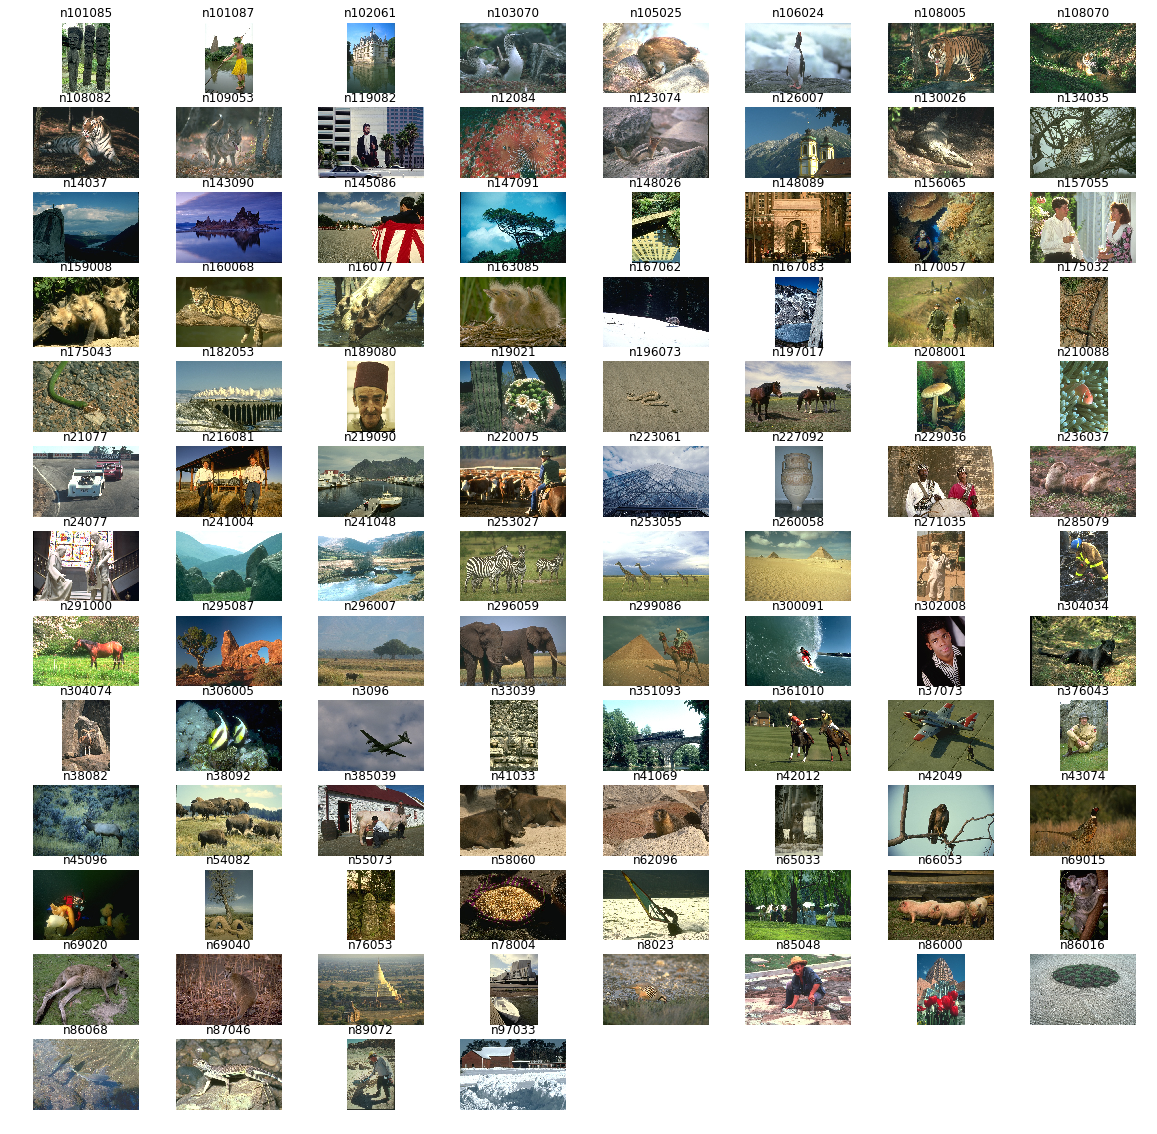

In [12]:
from quilt.data.akarve import BSDS300 as bsd
from quilt.asa.img import plot

bsd.images.test(asa=plot(figsize=(20, 20)))

```python
from quilt.data.akarve import BSDS300 as bsd
from quilt.asa.pytorch import dataset

my_dataset = pkg.mixed.img(asa=dataset(
    include=is_image,
    node_parser=node_parser,
    input_transform=input_transform(crop_size, upscale_factor),
    target_transform=target_transform(crop_size)
))
```

![](resources/mesh.png)

# Share your deserializers
* People struggle with mystery data formats
* Make your custom format accessible
* Data may be too large for standard loaders


# Rehydrate model

## Sharing trained models, saves billions of CPU cycles

![label free prediction](./resources/label_free.png)

In [32]:
quilt.install("aics/label_free")
from quilt.data.aics import label_free

  0%|          | 0.00/1.69G [00:00<?, ?B/s]

100%|██████████| 1.69G/1.69G [03:35<00:00, 7.81MB/s]


In [27]:
label_free

<GroupNode>
dna/
fibrillarin/
lamin_b1/
membrane/
sec61_beta/
tom20/
README

```python
import fnet
dna_serialized = label_free.dna.model()
dna_model = fnet.fnet_model.Model(dna_serialized)

# handle your input image here

prediction = dna_model.predict(input_image)
```

# Wrap Up

# Open science should expose the entire pipeline

![aics pipeline](./resources/pipeline.png)

## Quilt covers four bases

| | Internal | External |
|---|------|-----|
| Prototype data | ✓ | ✓ |
| Production data | ✓ | ✓ |

# Recommendations
* Version your data + models
* Build pipelines from reusable building blocks


# Design guidelines
* **immutable** package instances
* **distributed** blob storage layer
* **de-duplicate** repeated fragments via *hash tree*


# Architecture
* Compiler - build
    * pandas, pyarrow
* Registry - index, permission
    * flask, sqlalchemy
* Catalog - search, browse
    * react, redux

![](resources/ace.png)

https://www.allencell.org/programmatic-data-access.html

![](resources/article.png)

https://blog.jupyter.org/reproducible-data-dependencies-for-python-guest-post-d0f68293a99

# Questions?
* aneesh at quiltdata.io - https://quiltdata.com/
* jacksonb at alleninstitute.org - https://www.allencell.org/